## Análisis Exploratorio de Datos (EDA)
### Estadísticos descriptivos de las variables cuantitativas

En esta sección se calculan las principales medidas de tendencia central y dispersión
para las variables cuantitativas del conjunto de datos de MyAnimeList, con el objetivo
de comprender su distribución, variabilidad y posibles valores atípicos.


In [8]:
import pandas as pd
import numpy as np

# ==============================
# Carga del conjunto de datos
# ==============================
df = pd.read_csv("data.csv", encoding="latin1")

print("Información general del DataFrame:\n")
df.info()

# =====================================
# Selección de variables cuantitativas
# =====================================
variables_cuantitativas = [
    'Episodes',
    'Duration_Minutes',
    'Score',
    'Scored_Users',
    'Ranked',
    'Popularity',
    'Members'
]

df_num = df[variables_cuantitativas]

# Forzar conversión a valores numéricos
df_num = df_num.apply(pd.to_numeric, errors='coerce')

print("\nCantidad de valores nulos por variable:\n")
print(df_num.isnull().sum())

# Eliminación de valores nulos para el análisis descriptivo
df_num_clean = df_num.dropna()

print(f"\nNúmero de observaciones después de limpiar nulos: {df_num_clean.shape[0]}")

# ==============================
# Medidas de tendencia central
# ==============================
media = df_num_clean.mean()
mediana = df_num_clean.median()

print("\nMedia de las variables:\n")
print(media)

print("\nMediana de las variables:\n")
print(mediana)

# ==============================
# Medidas de dispersión
# ==============================
desviacion_std = df_num_clean.std()
minimos = df_num_clean.min()
maximos = df_num_clean.max()

print("\nDesviación estándar:\n")
print(desviacion_std)

print("\nValores mínimos:\n")
print(minimos)

print("\nValores máximos:\n")
print(maximos)

# ==============================
# Cuartiles e IQR
# ==============================
Q1 = df_num_clean.quantile(0.25)
Q3 = df_num_clean.quantile(0.75)
IQR = Q3 - Q1

print("\nPrimer cuartil (Q1):\n")
print(Q1)

print("\nTercer cuartil (Q3):\n")
print(Q3)

print("\nRango intercuartílico (IQR):\n")
print(IQR)


Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Sour

Resultados

El análisis inicial evidencia la presencia de valores faltantes en varias variables cuantitativas, particularmente en Score y Scored_Users, con 6,898 observaciones ausentes en cada una. Esta situación es coherente con la naturaleza del dataset, ya que existen animes que aún no han sido suficientemente evaluados por los usuarios. Asimismo, se identifican valores nulos en Episodes y Duration_Minutes, lo cual es esperable en obras como películas, especiales u otros formatos con información incompleta.

Tras la eliminación de registros con valores faltantes en las variables seleccionadas, el tamaño de la muestra se redujo a 13,030 observaciones, lo cual sigue representando un volumen de datos suficiente para realizar análisis estadísticos y exploratorios robustos.

La puntuación promedio (Score) presenta una media de 6.46 y una mediana de 6.47, valores muy cercanos entre sí, lo que sugiere una distribución aproximadamente simétrica y un consenso moderado entre los usuarios respecto a la calidad de los animes evaluados.

En cuanto al número de episodios, la media (12.59) es considerablemente mayor que la mediana (2), lo que indica una distribución fuertemente sesgada a la derecha. Esto refleja la coexistencia de un gran número de obras cortas junto con un número reducido de series de larga duración que influyen significativamente en el promedio.

La duración por episodio muestra una media de 25.97 minutos y una mediana de 23 minutos, valores consistentes con el formato estándar de episodios de anime, especialmente en producciones televisivas.

Variables relacionadas con la popularidad y participación de usuarios, como Scored_Users y Members, presentan diferencias marcadas entre media y mediana, lo que evidencia que la mayoría de los animes tiene un número relativamente bajo de usuarios, mientras que unos pocos títulos concentran una cantidad desproporcionadamente alta de atención.

La desviación estándar confirma una alta variabilidad en variables como Episodes, Scored_Users y Members, lo que sugiere la presencia de valores extremos. Por ejemplo, el número de episodios alcanza un máximo de 3,057, mientras que el número de miembros supera los 3.5 millones, lo que evidencia una fuerte heterogeneidad en el conjunto de datos.

Por el contrario, la puntuación (Score) presenta una desviación estándar relativamente baja (0.92), indicando que, pese a la diversidad de obras, las valoraciones tienden a concentrarse en un rango estrecho.

El análisis de cuartiles refuerza la existencia de distribuciones asimétricas:

El 50 % de los animes tiene entre 1 y 12 episodios, con un rango intercuartílico de 11 episodios.
La duración por episodio se concentra principalmente entre 6 y 26 minutos, lo que confirma la estandarización del formato.
La puntuación se encuentra mayoritariamente entre 5.83 y 7.14, con un IQR de 1.31, reflejando una variabilidad moderada.
En términos de popularidad y membresía, el IQR amplio indica que la mayoría de los animes tiene niveles bajos a medios de interacción, mientras que un subconjunto reducido alcanza niveles excepcionalmente altos.

----------------------------------------------------------------------------------------------------

En esta sección se presentan visualizaciones exploratorias con el objetivo de analizar
la distribución de las variables cuantitativas, identificar valores atípicos y examinar
posibles relaciones entre ellas.


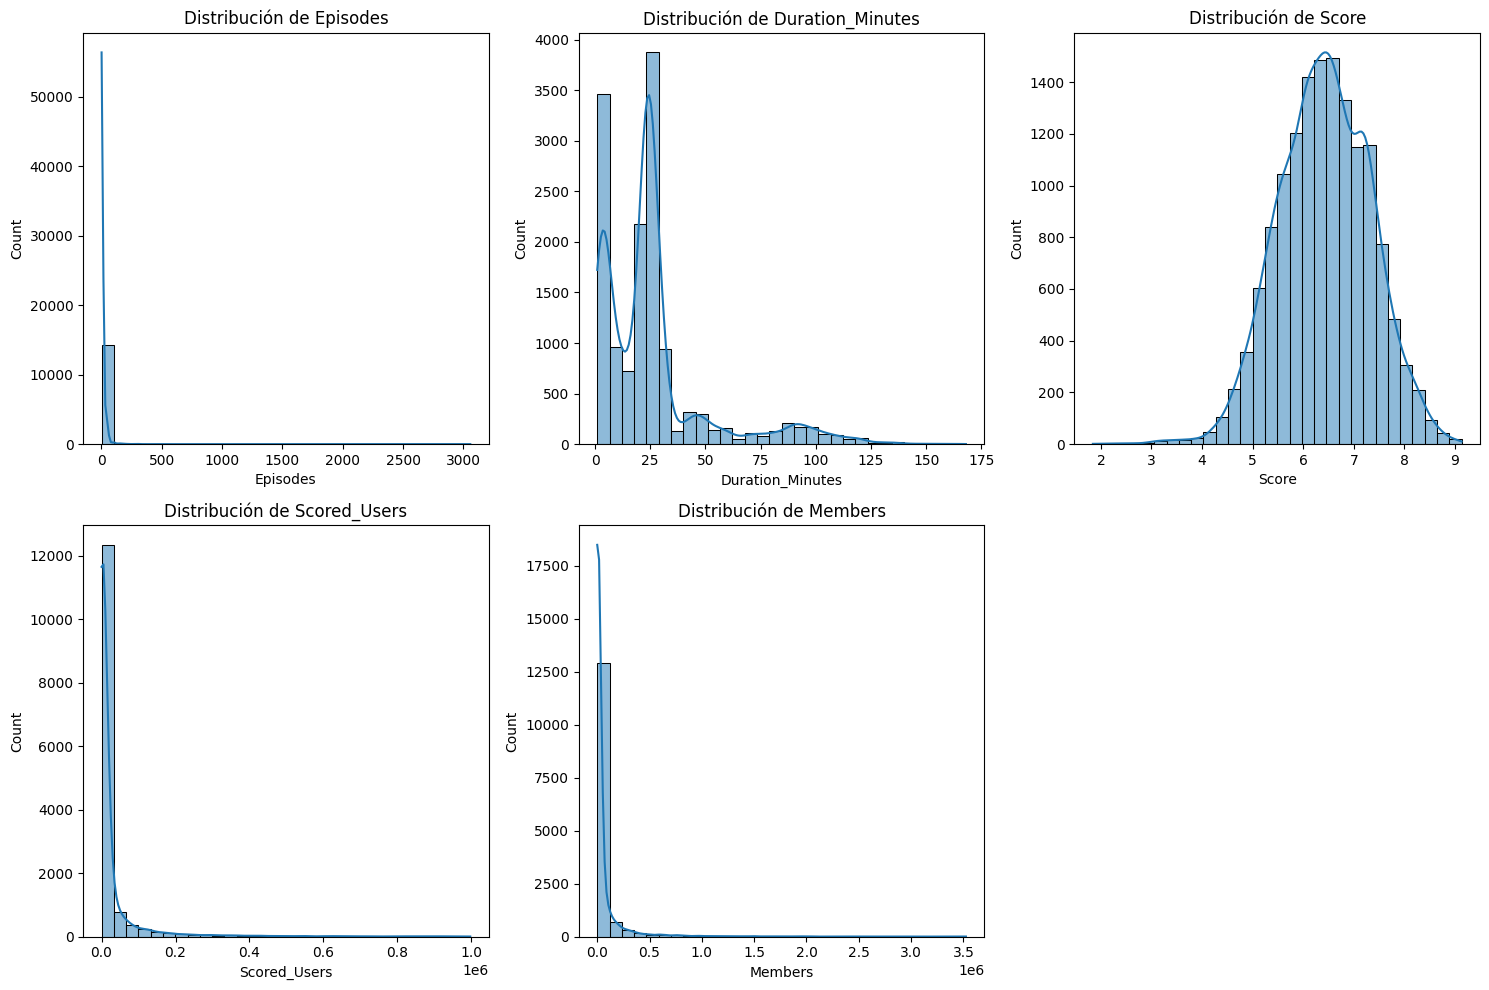

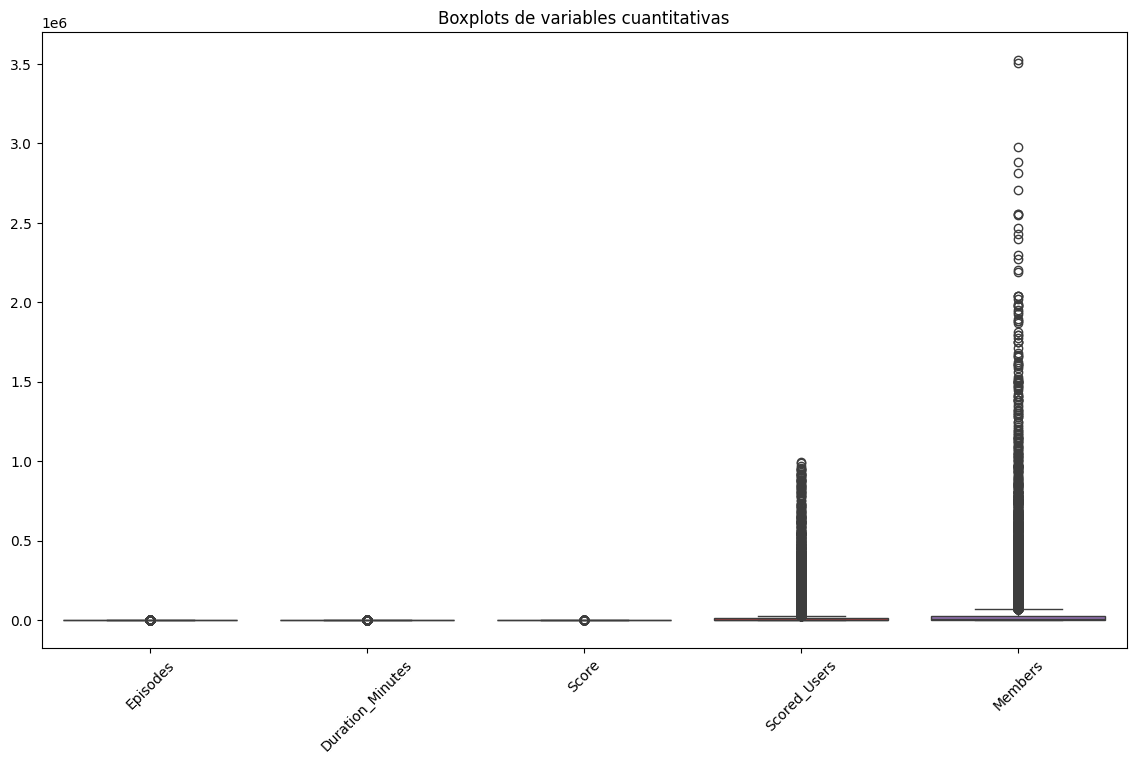

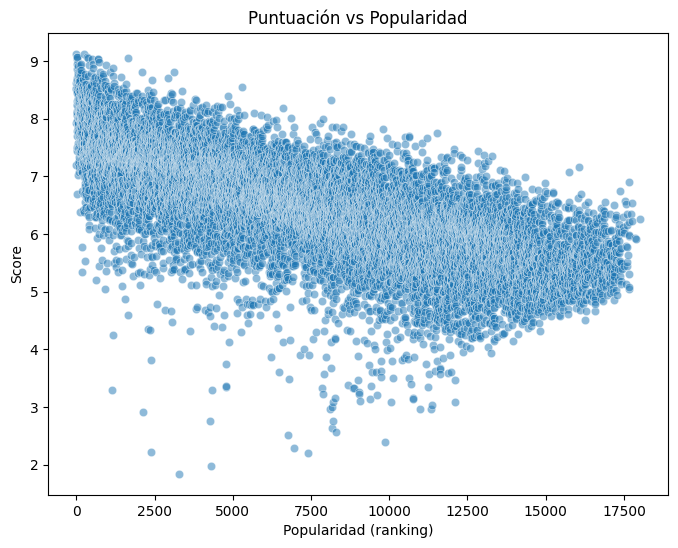

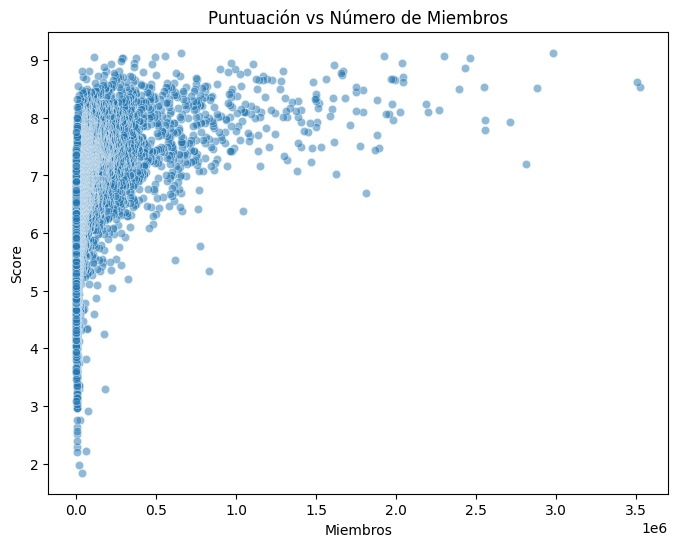

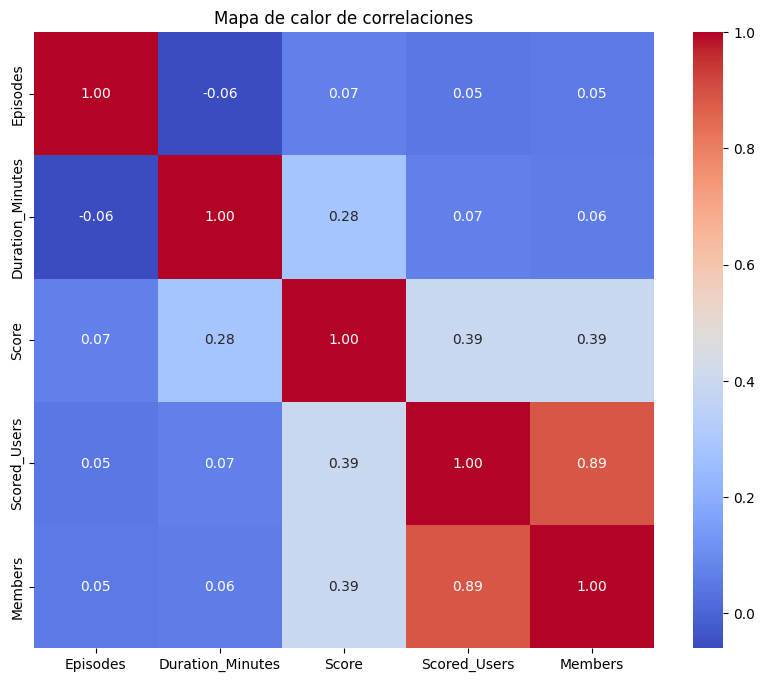

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv", encoding="latin1")

# ==============================
# Histogramas individuales

variables_hist = [
    'Episodes',
    'Duration_Minutes',
    'Score',
    'Scored_Users',
    'Members'
]
df_num = df[variables_hist]

# Forzar conversión a valores numéricos
df_num = df_num.apply(pd.to_numeric, errors='coerce')

# Eliminación de valores nulos para el análisis descriptivo
df_num_clean = df_num.dropna()

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_hist, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_num_clean[var], bins=30, kde=True)
    plt.title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

# ==============================
# Boxplots para variables clave

plt.figure(figsize=(14, 8))

sns.boxplot(data=df_num_clean[
    ['Episodes', 'Duration_Minutes', 'Score', 'Scored_Users', 'Members']
])

plt.title("Boxplots de variables cuantitativas")
plt.xticks(rotation=45)
plt.show()


# ==============================
# Gráficos de dispersión (relaciones entre variables)

# Score vs Popularidad

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='Popularity',
    y='Score',
    alpha=0.5
)

plt.title("Puntuación vs Popularidad")
plt.xlabel("Popularidad (ranking)")
plt.ylabel("Score")
plt.show()



# Score vs Miembros

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='Members',
    y='Score',
    alpha=0.5
)

plt.title("Puntuación vs Número de Miembros")
plt.xlabel("Miembros")
plt.ylabel("Score")
plt.show()

# ==============================
# Matriz de correlación
plt.figure(figsize=(10, 8))

correlation_matrix = df_num_clean.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Mapa de calor de correlaciones")
plt.show()




Resultados

Interpretación de las visualizaciones (Histogramas)

Distribución del número de episodios (Episodes)

La distribución del número de episodios presenta una asimetría positiva muy pronunciada, con una alta concentración de observaciones en valores bajos y una cola larga hacia la derecha. Esto indica que la mayoría de los animes cuenta con muy pocos episodios, mientras que existe un número reducido de series de larga duración que alcanzan valores extremadamente altos. Este comportamiento explica la diferencia observada previamente entre la media y la mediana y confirma la presencia de valores atípicos en esta variable.

Distribución de la duración por episodio (Duration_Minutes)

La duración por episodio muestra una distribución asimétrica a la derecha, aunque menos extrema que la observada en el número de episodios. Se identifican picos claros alrededor de los 20–25 minutos, lo cual coincide con el formato estándar de episodios de anime televisivo. Asimismo, se observa una cola hacia valores más altos que corresponde a películas y especiales, lo que introduce variabilidad adicional en la variable.

Distribución de la puntuación (Score)

La puntuación promedio presenta una distribución aproximadamente normal, centrada alrededor de valores entre 6 y 7, con una dispersión moderada. Esta forma sugiere que la mayoría de los animes recibe valoraciones intermedias y que las puntuaciones extremadamente bajas o altas son poco frecuentes. La simetría relativa de esta distribución respalda los resultados obtenidos en los estadísticos descriptivos, donde la media y la mediana eran muy similares.

Distribución del número de usuarios que puntuaron (Scored_Users)

La variable Scored_Users exhibe una asimetría positiva extrema, con una gran concentración de observaciones en valores bajos y una cola larga que se extiende hasta valores muy elevados. Esto indica que la mayoría de los animes recibe pocas puntuaciones, mientras que solo un número reducido de títulos concentra una gran cantidad de usuarios que los evalúan. Este patrón es característico de plataformas de contenido digital y refleja una distribución altamente desigual de la atención de los usuarios.

Distribución del número de miembros (Members)

De manera similar a Scored_Users, la variable Members presenta una distribución fuertemente sesgada a la derecha. La mayoría de los animes cuenta con un número reducido de miembros, mientras que unos pocos títulos alcanzan cifras excepcionalmente altas. Esta alta dispersión confirma la presencia de outliers y sugiere que las métricas de popularidad están dominadas por un subconjunto pequeño de obras muy populares.

Conclusiones generales de los histogramas

En conjunto, los histogramas revelan que la mayoría de las variables cuantitativas del dataset presentan distribuciones no normales, con marcada asimetría positiva y presencia de valores extremos, especialmente en aquellas relacionadas con popularidad y alcance. La excepción principal es la puntuación promedio, cuya distribución es más concentrada y cercana a la normalidad.

Estos hallazgos justifican el uso de boxplots para identificar valores atípicos, así como la aplicación de transformaciones o métodos robustos en análisis posteriores, como pruebas estadísticas y técnicas de clustering.

Interpretación de los boxplots de las variables cuantitativas

El análisis mediante boxplots permite identificar la dispersión, la asimetría y la presencia de valores atípicos en las principales variables cuantitativas del conjunto de datos.

Número de episodios (Episodes)

El boxplot del número de episodios evidencia una asimetría positiva extrema, con la mayor parte de las observaciones concentradas en valores bajos y una gran cantidad de valores atípicos hacia el extremo superior. Esto confirma que la mayoría de los animes tiene pocos episodios, mientras que un subconjunto reducido de series de larga duración genera una cola extensa. La presencia de estos outliers explica la elevada desviación estándar observada en los estadísticos descriptivos.

Duración por episodio (Duration_Minutes)

La duración por episodio presenta una dispersión moderada, con la mediana ubicada alrededor de los valores esperados para episodios estándar. No obstante, se identifican valores atípicos superiores, correspondientes principalmente a películas y especiales. Aunque existen outliers, su impacto es menor en comparación con otras variables, lo que indica una estructura relativamente más homogénea.

Puntuación promedio (Score)

El boxplot de la puntuación muestra una variabilidad reducida y una cantidad limitada de valores atípicos. La caja es estrecha y la mediana se encuentra centrada, lo que indica un alto nivel de concentración de las puntuaciones alrededor de valores intermedios. Esto refuerza la idea de que existe un consenso general en las valoraciones de los usuarios.

Usuarios que puntuaron (Scored_Users)

Esta variable presenta una dispersión extremadamente alta, con una gran cantidad de valores atípicos superiores. La mayoría de los animes recibe pocas puntuaciones, mientras que un número muy reducido concentra cientos de miles de usuarios. El boxplot confirma una distribución altamente sesgada, característica de fenómenos de popularidad en plataformas digitales.

Número de miembros (Members)

El comportamiento del número de miembros es similar al observado en Scored_Users, aunque aún más extremo. Se observa una concentración muy marcada en valores bajos y una gran cantidad de valores atípicos que alcanzan cifras millonarias. Este patrón evidencia una fuerte desigualdad en la distribución de la audiencia y resalta la existencia de títulos excepcionalmente populares.

Conclusión general de los boxplots

En conjunto, los boxplots confirman que la mayoría de las variables cuantitativas del dataset presentan distribuciones asimétricas con presencia significativa de valores atípicos, especialmente aquellas relacionadas con popularidad y alcance. En contraste, la puntuación promedio se comporta de manera más estable y concentrada.

Estos resultados justifican el uso de métodos estadísticos robustos, transformaciones de variables o escalamiento previo en análisis posteriores, como pruebas de hipótesis y técnicas de clustering.

Interpretación del gráfico de dispersión: Puntuación vs Popularidad

El gráfico de dispersión muestra la relación entre la puntuación promedio (Score) y la popularidad, medida como ranking en MyAnimeList, donde valores más bajos indican mayor popularidad. Se observa una tendencia negativa clara, lo que indica que los animes con mejor posición en el ranking de popularidad tienden a recibir puntuaciones más altas.

No obstante, esta relación no es estrictamente lineal ni fuerte. Existe una alta dispersión vertical de los puntos para prácticamente todos los niveles de popularidad, lo que sugiere que la popularidad por sí sola no determina la puntuación otorgada por los usuarios. Animes con niveles similares de popularidad pueden presentar valoraciones significativamente diferentes.

Asimismo, se aprecia que los animes menos populares (con valores altos en el ranking de popularidad) tienden a concentrarse en puntuaciones más bajas, generalmente entre 5 y 6, mientras que los animes más populares muestran una mayor concentración de puntuaciones en rangos superiores, aproximadamente entre 6.5 y 8. Sin embargo, también se identifican excepciones, con títulos poco populares que alcanzan puntuaciones elevadas y títulos populares con valoraciones más modestas.

La presencia de una nube densa de puntos y la ausencia de una relación determinista refuerzan la idea de que la puntuación está influenciada por múltiples factores adicionales, como el tipo de anime, el género, la duración, el número de episodios y la base de usuarios que lo evalúa.

Conclusión para la investigación

Este comportamiento sugiere una relación negativa débil a moderada entre popularidad y puntuación, lo que respalda su inclusión como variable explicativa en modelos estadísticos, pero también indica que no es suficiente por sí sola para explicar completamente la valoración de los animes.

Estos resultados proporcionan evidencia exploratoria relevante para la primera pregunta de investigación, relacionada con los factores que influyen en la puntuación promedio, y justifican la aplicación de análisis estadísticos adicionales para evaluar estas relaciones de manera más formal.

Interpretación del gráfico de dispersión: Puntuación vs Número de Miembros

El gráfico de dispersión que representa la relación entre la puntuación promedio y el número de miembros muestra una asociación positiva clara, aunque no perfectamente lineal, entre ambas variables. En general, los animes que cuentan con un mayor número de miembros tienden a concentrarse en rangos de puntuación elevados, principalmente entre 7 y 9 puntos, lo que sugiere que las obras con mayor alcance y visibilidad dentro de la plataforma suelen recibir valoraciones más favorables por parte de los usuarios. Por el contrario, los animes con pocos miembros presentan una dispersión considerablemente mayor en sus puntuaciones, abarcando desde valores muy bajos hasta calificaciones altas, lo cual indica una mayor heterogeneidad en la percepción de calidad de títulos menos conocidos o de nicho. A medida que el número de miembros aumenta, la variabilidad de la puntuación se reduce, evidenciando un efecto de estabilización en la evaluación colectiva, posiblemente debido a un mayor volumen de opiniones que suaviza valoraciones extremas. Sin embargo, la ausencia de una relación estrictamente proporcional confirma que el número de miembros no es un determinante único de la puntuación, sino que actúa como un factor asociado a la consistencia y confiabilidad de las evaluaciones. En este sentido, el gráfico sugiere que la popularidad contribuye a una valoración más homogénea y generalmente alta, aunque no garantiza por sí sola una mejor puntuación promedio.